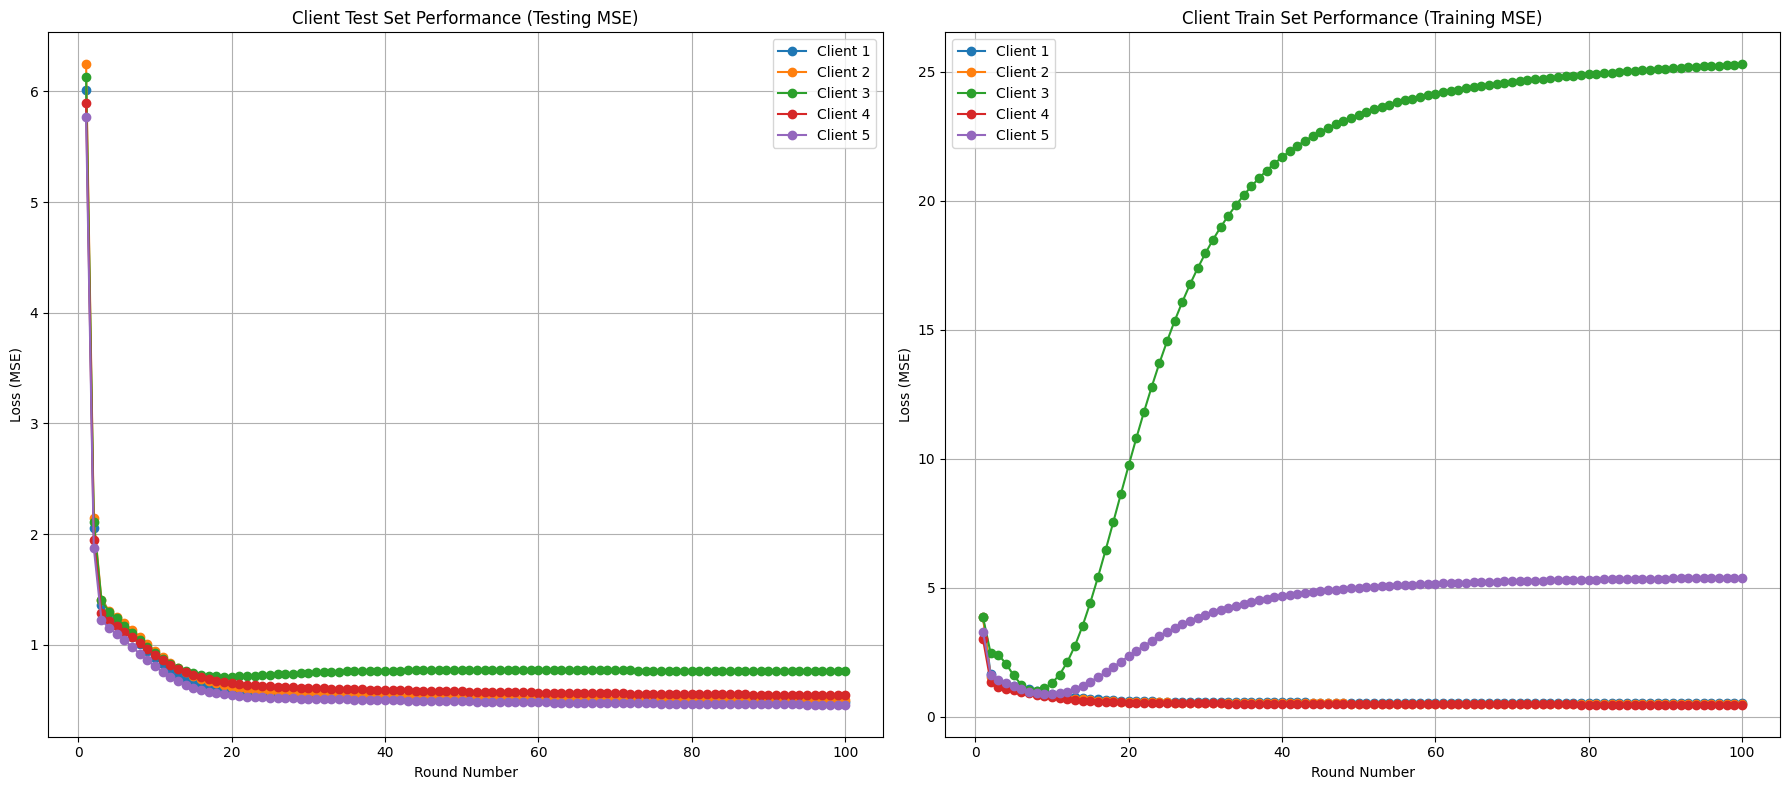

In [2]:
import matplotlib.pyplot as plt

def parse_log_file(filepath, mse_type="Testing"):
    """ Parse the log file to extract MSE values for each iteration based on the type (Testing or Training). """
    mse_values = []
    with open(filepath, 'r') as file:
        for line in file:
            if f"{mse_type} MSE" in line:
                mse_value = float(line.split(': ')[1])
                mse_values.append(mse_value)
    return mse_values

# Paths to the log files for five clients
client_paths = {
    'Client 1': 'client1_log.txt',
    'Client 2': 'client2_log.txt',
    'Client 3': 'client3_log.txt',
    'Client 4': 'client4_log.txt',
    'Client 5': 'client5_log.txt'
}

# Parse the log files for all clients for both Testing and Training MSE
client_testing_mse = {client: parse_log_file(path, "Testing") for client, path in client_paths.items()}
client_training_mse = {client: parse_log_file(path, "Training") for client, path in client_paths.items()}

# Generate round numbers based on the first client's data length
rounds = list(range(1, len(client_testing_mse['Client 1']) + 1))

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Create a figure and a set of subplots with 1 row and 2 columns

# Plot testing MSE on the first subplot
for client, mse in client_testing_mse.items():
    ax1.plot(rounds, mse, label=client, marker='o')
ax1.set_title('Client Test Set Performance (Testing MSE)')
ax1.set_xlabel('Round Number')
ax1.set_ylabel('Loss (MSE)')
ax1.legend()
ax1.grid(True)

# Plot training MSE on the second subplot
for client, mse in client_training_mse.items():
    ax2.plot(rounds, mse, label=client, marker='o')
ax2.set_title('Client Train Set Performance (Training MSE)')
ax2.set_xlabel('Round Number')
ax2.set_ylabel('Loss (MSE)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
